In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [2]:
def generar_arbol_regular_balanceado(k=3, altura=2):
    G = nx.Graph()
    node_id = 0
    edges = []
    niveles = [[node_id]]
    node_id += 1

    for _ in range(altura):
        nivel_actual = []
        for padre in niveles[-1]:
            hijos = [node_id + i for i in range(k)]
            edges.extend((padre, h) for h in hijos)
            nivel_actual.extend(hijos)
            node_id += k
        niveles.append(nivel_actual)
    G.add_edges_from(edges)
    return G

In [3]:
def dibujar_arbol(G, titulo,pos, node_labels):
    nx.draw(G, pos, node_size=600)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='white')
    plt.title(titulo)
    plt.show()

# Etiquetado por centralidad

In [4]:
def etiquetado_por_centralidad(G, centralidad):
    if centralidad == 1:
        centralidad = nx.degree_centrality(G)
    elif centralidad == 2:
        centralidad = nx.eigenvector_centrality(G)
    elif centralidad == 3:
        centralidad = nx.closeness_centrality(G)
    else:
        return None
    centralidad_ordenada = sorted(centralidad.items(), key=lambda item: item[1])
    print(centralidad_ordenada)
    node_labels = {centralidad_ordenada[i][0]:i for i in range(len(centralidad_ordenada))}
    return node_labels

## Lee las redes

In [5]:
def prufer_sequence_from_tree(edges):
    """
    Obtiene la sucesión de Prüfer de un árbol dado.

    Parámetros:
      - edges: lista de tuplas (u, v) que representan las aristas de un árbol etiquetado.

    Retorna:
      - prufer_seq: lista que representa la sucesión de Prüfer del árbol.
    """
    # 1. Determinar el conjunto de nodos y el número total de vértices.
    nodes = set()
    for u, v in edges:
        nodes.add(u)
        nodes.add(v)
    n = len(nodes)

    # 2. Crear la lista de adyacencia y calcular el grado de cada nodo.
    adj = {node: [] for node in nodes}
    degree = {node: 0 for node in nodes}

    for u, v in edges:
        adj[u].append(v)
        adj[v].append(u)
        degree[u] += 1
        degree[v] += 1

    # 3. Inicializar un heap (min-heap) con todas las hojas (nodos con grado 1)
    heap = []
    for node in nodes:
        if degree[node] == 1:
            heapq.heappush(heap, node)

    prufer_seq = []

    # 4. Realizar n-2 iteraciones para construir la sucesión de Prüfer.
    for _ in range(n - 2):
        # a) Extraer la hoja de menor etiqueta.
        leaf = heapq.heappop(heap)

        # b) Su hoja tendrá un único vecino; se toma el primer (y único) de su lista de adyacencia.
        neighbor = adj[leaf][0]
        prufer_seq.append(neighbor)

        # c) Actualizar el grado del vecino, eliminando la conexión con la hoja.
        degree[neighbor] -= 1
        adj[neighbor].remove(leaf)

        # d) La hoja se elimina del árbol; (podríamos marcarla con grado 0).
        degree[leaf] = 0

        # e) Si el vecino ahora es una hoja (grado 1), se agrega al heap.
        if degree[neighbor] == 1:
            heapq.heappush(heap, neighbor)

    return prufer_seq

In [6]:
PATH_NEUROESPORA = "redes/Neurospora_crassa/"
REDES_NEUROESPORA = {1:["Muestra1_M1N17h","Muestra1_M1N18h","Muestra1_M1N20h","Muestra1_M1N22h","Muestra1_M1N24h"],
    2:["Muestra2_M2N18h","Muestra2_M2N20h","Muestra2_M2N22h","Muestra2_M2N24h"],
    3:["Muestra3_M3N17h","Muestra3_M3N18h","Muestra3_M3N20h","Muestra3_M3N22h","Muestra3_M3N24h"],
    4:["Muestra4_M4N17h","Muestra4_M4N18h","Muestra4_M4N20h","Muestra4_M4N22h","Muestra4_M4N24h"],
    5:["Muestra5_M5N18h","Muestra5_M5N20h","Muestra5_M5N22h","Muestra5_M5N24h"]
}
# 1-degree, 2-eigenvector
CENTRALIDAD = 3
TIPO = {1:"Degree", 2: "Eigenvector", 3: "Closeness"}

In [7]:
def muestra_secuencias(secuencias, etiquetas, tipo_hongo):
    plt.figure(figsize=(12, 6))
    for i, seq in enumerate(secuencias):
        plt.plot(seq, label=etiquetas[i], marker="o", linestyle="-")
    plt.xlabel("Índice en la secuencia")
    plt.ylabel("Etiqueta del vértice")
    plt.title(tipo_hongo + " - Secuencias de Prüfer - " + TIPO[CENTRALIDAD])
    plt.legend()
    plt.grid()
    plt.show()


**** Procesando red: Muestra1_M1N17h con 42 nodos y 41 aristas.
Es árbol:  True
[('(2309.5, -529.0)', 0.09213483146067415), ('(2203.5, -506.5)', 0.09213483146067415), ('(-1722.0, 58.5)', 0.09297052154195011), ('(-2158.5, -39.0)', 0.09297052154195011), ('(1898.0, -933.5)', 0.10024449877750612), ('(-1154.5, -14.0)', 0.10123456790123457), ('(2208.5, -554.5)', 0.10123456790123457), ('(-1671.0, -96.0)', 0.10224438902743142), ('(1179.0, -504.5)', 0.10875331564986737), ('(-959.5, -26.5)', 0.10991957104557641), ('(1776.5, -684.5)', 0.1111111111111111), ('(-1154.0, 0.0)', 0.11232876712328767), ('(980.0, -307.0)', 0.1174785100286533), ('(-754.5, -21.5)', 0.11884057971014493), ('(1192.5, -496.5)', 0.12166172106824925), ('(-960.0, -31.5)', 0.12312312312312312), ('(810.0, -353.5)', 0.12615384615384614), ('(-668.5, -99.5)', 0.1277258566978193), ('(974.0, -344.5)', 0.13268608414239483), ('(-761.5, -53.5)', 0.13442622950819672), ('(764.5, -299.0)', 0.13442622950819672), ('(-629.5, -81.5)', 0.136212624

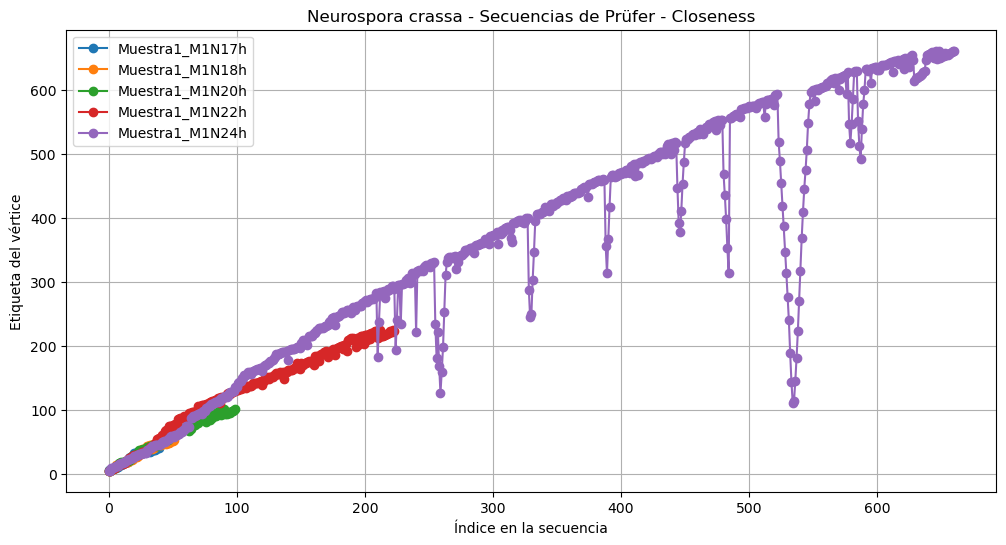

**** Procesando red: Muestra2_M2N18h con 44 nodos y 43 aristas.
Es árbol:  True
[('(1466.0, -1138.5)', 0.09168443496801706), ('(1416.5, -692.0)', 0.09168443496801706), ('(-2351.0, -1511.0)', 0.09976798143851508), ('(-2336.0, -1713.0)', 0.09976798143851508), ('(560.0, -51.0)', 0.09976798143851508), ('(1195.0, -722.5)', 0.10070257611241218), ('(-1199.0, -1180.0)', 0.10723192019950124), ('(-1282.5, -463.5)', 0.10723192019950124), ('(454.0, -31.5)', 0.10831234256926953), ('(-1916.5, -1514.5)', 0.10941475826972011), ('(-2262.5, -1548.0)', 0.11053984575835475), ('(555.0, -67.0)', 0.11053984575835475), ('(240.0, 53.0)', 0.11716621253405994), ('(-1316.0, -444.0)', 0.1184573002754821), ('(-1322.0, -473.5)', 0.11977715877437325), ('(-1588.5, -1064.0)', 0.11977715877437325), ('(450.5, -47.0)', 0.12112676056338029), ('(-2085.0, -1279.0)', 0.1225071225071225), ('(186.5, -100.5)', 0.12609970674486803), ('(230.5, -18.0)', 0.13230769230769232), ('(-129.0, -28.0)', 0.13230769230769232), ('(-257.0, -322

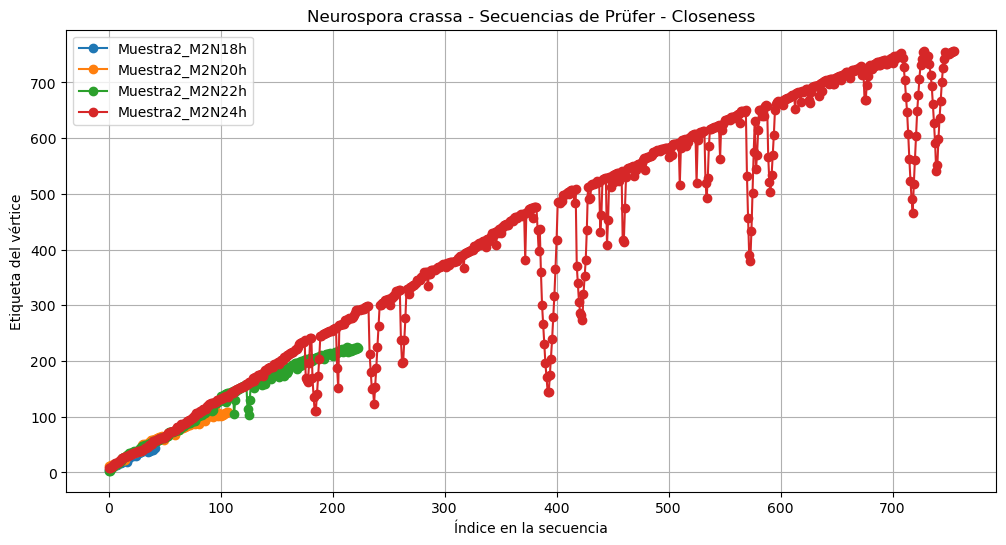

**** Procesando red: Muestra3_M3N17h con 6 nodos y 5 aristas.
Es árbol:  True
[('(71.0, 915.0)', 0.45454545454545453), ('(61.5, 8.0)', 0.45454545454545453), ('(50.5, -65.5)', 0.45454545454545453), ('(-212.5, -757.0)', 0.45454545454545453), ('(0, 0)', 0.7142857142857143), ('(-1.0, -65.0)', 0.7142857142857143)]
**** Procesando red: Muestra3_M3N18h con 24 nodos y 23 aristas.
Es árbol:  True
[('(-156.0, 1288.5)', 0.14838709677419354), ('(-146.5, 1721.5)', 0.14838709677419354), ('(-289.5, -1526.0)', 0.14838709677419354), ('(-116.5, -1156.5)', 0.14838709677419354), ('(-144.5, -481.5)', 0.1678832116788321), ('(115.5, 683.0)', 0.1678832116788321), ('(73.0, 1067.0)', 0.17293233082706766), ('(-259.5, -1018.0)', 0.17293233082706766), ('(-49.5, -113.0)', 0.18699186991869918), ('(60.5, 553.5)', 0.18699186991869918), ('(-165.0, -477.5)', 0.2), ('(77.5, 682.0)', 0.2), ('(-8.5, 488.5)', 0.20353982300884957), ('(164.5, -87.5)', 0.20353982300884957), ('(260.0, 39.5)', 0.21495327102803738), ('(7.5, 443.0

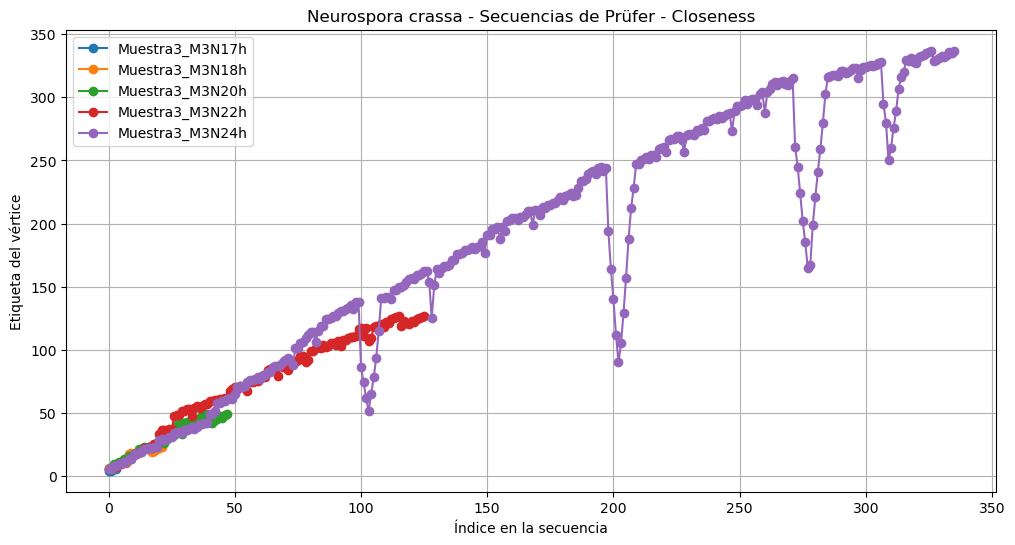

**** Procesando red: Muestra4_M4N17h con 58 nodos y 57 aristas.
Es árbol:  True
[('(-4138, 636)', 0.06761565836298933), ('(-4255, 548)', 0.06761565836298933), ('(-3868, 420)', 0.07206068268015171), ('(-4117, 577)', 0.0724269377382465), ('(1618, 408)', 0.07671601615074024), ('(1711, 431)', 0.07671601615074024), ('(1453, 209)', 0.07671601615074024), ('(1439, 207)', 0.07671601615074024), ('(-3270, 1013)', 0.07671601615074024), ('(-3823, 611)', 0.07755102040816327), ('(-3150, 98)', 0.0815450643776824), ('(1623, 379)', 0.08296943231441048), ('(-3168, 523)', 0.08296943231441048), ('(1440, 214)', 0.08296943231441048), ('(-2037, 400)', 0.08649468892261002), ('(1231, 335)', 0.08809891808346214), ('(-3116, 512)', 0.08864696734059098), ('(-89, -710)', 0.0892018779342723), ('(-124, -900)', 0.0892018779342723), ('(1390, 265)', 0.08976377952755905), ('(-2065, 275)', 0.09149277688603531), ('(1300, -427)', 0.09390444810543658), ('(-2055, 363)', 0.0945273631840796), ('(1264, 187)', 0.09644670050761421)

[('(-10039, 172)', 0.026401797569196202), ('(-10308, 261)', 0.026401797569196202), ('(6675, -1053)', 0.026832053145111064), ('(6504, -909)', 0.026832053145111064), ('(-9886, 496)', 0.027110644992134243), ('(-9971, 282)', 0.027116332738906956), ('(6266, -801)', 0.027564512689272767), ('(6565, -820)', 0.027570392491467578), ('(-9559, 555)', 0.027852602090291993), ('(-9678, 276)', 0.027864611404548885), ('(6095, -705)', 0.028331871985971067), ('(6380, -532)', 0.028344298245614036), ('(-9203, 923)', 0.028573007626837624), ('(-9061, 881)', 0.028573007626837624), ('(-9274, -191)', 0.028629970096356185), ('(-9357, 251)', 0.028649008090435555), ('(5768, 2653)', 0.028999326901503253), ('(5834, 2875)', 0.028999326901503253), ('(5989, -320)', 0.029136609558160505), ('(6188, -320)', 0.02915632754342432), ('(-8895, 753)', 0.02940507337049255), ('(-9045, 915)', 0.029411764705882353), ('(-9002, 729)', 0.029445267114705548), ('(-9086, 237)', 0.029472124045148786), ('(5662, 2557)', 0.029856779856779855

[('(8057, -3553)', 0.019460726846424383), ('(8176, -3623)', 0.019460726846424383), ('(-12206, 215)', 0.01958057587007537), ('(-12013, 397)', 0.01958057587007537), ('(-12143, 1456)', 0.019581548395107718), ('(-11526, 1683)', 0.019581548395107718), ('(-11527, 1932)', 0.019581548395107718), ('(-11722, 1720)', 0.019581548395107718), ('(8072, -2895)', 0.01984471541646218), ('(8216, -2831)', 0.01984471541646218), ('(7856, -3439)', 0.01984571435762556), ('(8058, -3520)', 0.019846713399363194), ('(-11428, 1506)', 0.01996177263578942), ('(-11155, 1871)', 0.01996177263578942), ('(-11738, 552)', 0.019970367368647664), ('(-12019, 419)', 0.019971379000291275), ('(-12028, 1350)', 0.019972390734431793), ('(-11490, 1666)', 0.019972390734431793), ('(7156, -2792)', 0.020242083509825818), ('(6891, -2898)', 0.020242083509825818), ('(8049, -2871)', 0.020246241542668603), ('(7887, -3333)', 0.020247281317806565), ('(-11115, 1445)', 0.02036704593886012), ('(-11272, 1405)', 0.020368098159509202), ('(-11756, 59

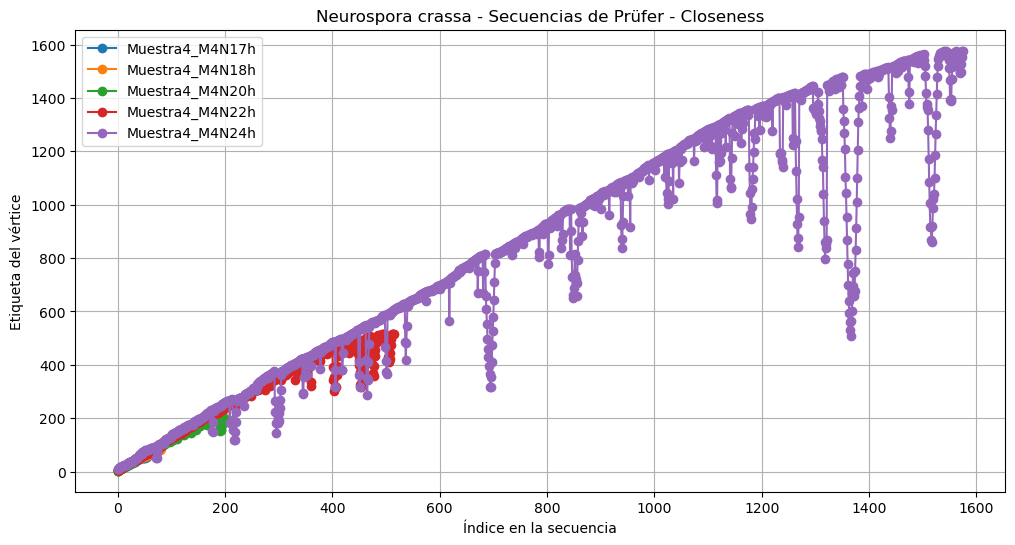

**** Procesando red: Muestra5_M5N18h con 48 nodos y 47 aristas.
Es árbol:  True
[('(2885.0, 261.5)', 0.08231173380035026), ('(2984.5, 291.0)', 0.08231173380035026), ('(-2536.0, 59.5)', 0.0865561694290976), ('(-2499.0, 98.0)', 0.0865561694290976), ('(2686.0, 259.5)', 0.0888468809073724), ('(2907.0, 222.0)', 0.08952380952380952), ('(-2216.0, 39.0)', 0.09381237524950099), ('(-2489.0, 87.5)', 0.09456740442655935), ('(1810.0, 392.0)', 0.09572301425661914), ('(2702.0, 138.0)', 0.09730848861283643), ('(-2225.5, 232.5)', 0.10151187904967603), ('(1566.5, 582.5)', 0.10284463894967177), ('(-2223.0, 214.5)', 0.10329670329670329), ('(1756.5, -15.0)', 0.10561797752808989), ('(-1956.0, 631.0)', 0.10955710955710955), ('(1116.5, 23.0)', 0.11007025761124122), ('(-2214.5, 223.5)', 0.11270983213429256), ('(-1331.5, 54.0)', 0.11325301204819277), ('(-1477.0, -39.5)', 0.11325301204819277), ('(1387.0, 5.0)', 0.11435523114355231), ('(1024.5, 13.5)', 0.1172069825436409), ('(-1637.5, 692.0)', 0.11779448621553884

[('(243.0, -4949.5)', 0.026561184985692644), ('(95.5, -4906.5)', 0.026561184985692644), ('(64.5, -4462.5)', 0.02728121434251928), ('(107.5, -4825.5)', 0.027284988069301793), ('(-248.0, -4674.5)', 0.028037383177570093), ('(-123.0, -4567.5)', 0.028045355987630183), ('(6574.5, -1731.0)', 0.028654439803885965), ('(6686.0, -1562.5)', 0.028654439803885965), ('(-567.5, -4847.5)', 0.02883245021012242), ('(-191.5, -4506.5)', 0.02884509925785106), ('(6350.5, -1837.0)', 0.029494224514971402), ('(6482.5, -1692.0)', 0.02949863536097506), ('(-1080.5, -4706.5)', 0.029651621631778723), ('(-1102.0, -4862.5)', 0.029651621631778723), ('(-710.5, -4740.5)', 0.02966946188846689), ('(-394.5, -4349.5)', 0.029687323625691386), ('(4904.0, -3063.5)', 0.030344986731279566), ('(4849.5, -3450.5)', 0.030344986731279566), ('(5035.0, -3563.5)', 0.030344986731279566), ('(4900.0, -3054.5)', 0.030344986731279566), ('(6282.5, -2141.5)', 0.03038003927457549), ('(6304.5, -1780.5)', 0.03038940030042753), ('(-1313.5, -4410.5)

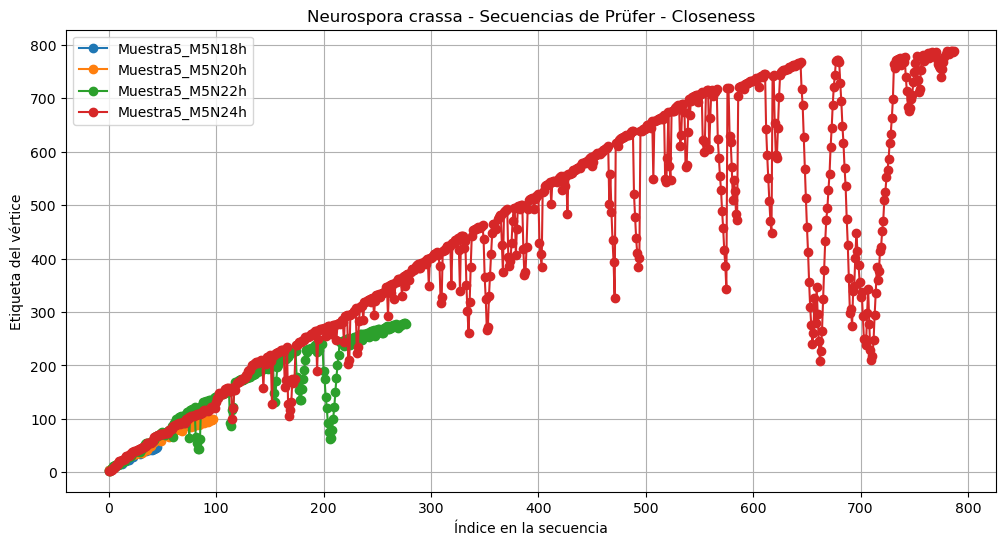

In [8]:
for muestra in range(1,6):
    prufer_seq = list()
    for red in REDES_NEUROESPORA[muestra]:
        G = nx.read_gexf(PATH_NEUROESPORA + red + ".gexf")
        print("**** Procesando red:", red, "con", G.number_of_nodes(), "nodos y", G.number_of_edges(), "aristas.")
        print("Es árbol: ", nx.is_tree(G))
        if not nx.is_tree(G):
            T = nx.minimum_spanning_tree(G)
            node_labels = etiquetado_por_centralidad(G, CENTRALIDAD)
            H=T.copy()
        else:
            node_labels = etiquetado_por_centralidad(G, CENTRALIDAD)
            H=G.copy()
        if node_labels != None:
            G_relabelled = nx.relabel_nodes(H, node_labels, copy=True)
        else:
            print("No genero etiquetas")
        ps = prufer_sequence_from_tree(G_relabelled.edges())
        pos = {n:(G.nodes[n]['x'],G.nodes[n]['y']) for n in G.nodes()}
        #dibujar_arbol(G, red,pos, node_labels)
        #print("Secuencia de Prüfer:", ps)
        prufer_seq.append(ps)
    muestra_secuencias(prufer_seq, REDES_NEUROESPORA[muestra], "Neurospora crassa")


In [36]:
PATH_TRICHODERMA = "redes/Trichoderma_atroviride/"
REDES_TRICHODERMA = {1:["Muestra1_M1T24h","Muestra1_M1T26h","Muestra1_M1T28h","Muestra1_M1T30h","Muestra1_M1T32h"],
    2:["Muestra2_M2T24h","Muestra2_M2T26h","Muestra2_M2T28h","Muestra2_M2T30h","Muestra2_M2T32h"],
    3:["Muestra3_M3T26h","Muestra3_M3T28h","Muestra3_M3T30h","Muestra3_M3T32h","Muestra3_M3T34h","Muestra3_M3T36h"],
    4:["Muestra4_M4T26h","Muestra4_M4T28h","Muestra4_M4T30h","Muestra4_M4T32h","Muestra4_M4T34h","Muestra4_M4T36h"],
    5:["Muestra5_M5T26h","Muestra5_M5T28h","Muestra5_M5T30h","Muestra5_M5T32h","Muestra5_M5T36h"]
}

In [9]:
for muestra in range(1,6):
    prufer_seq = list()
    for red in REDES_TRICHODERMA[muestra]:
        G = nx.read_gexf(PATH_TRICHODERMA + red + ".gexf")
        print("**** Procesando red:", red, "con", G.number_of_nodes(), "nodos y", G.number_of_edges(), "aristas.")
        print("Es árbol: ", nx.is_tree(G))
        if not nx.is_tree(G):
            T = nx.minimum_spanning_tree(G)
            node_labels = etiquetado_por_centralidad(T, CENTRALIDAD)
            H=T.copy()
        else:
            node_labels = etiquetado_por_centralidad(G, CENTRALIDAD)
            H=G.copy()
        if node_labels != None:
            G_relabelled = nx.relabel_nodes(H, node_labels, copy=True)
        else:
            print("No genero etiquetas")
        ps = prufer_sequence_from_tree(G_relabelled.edges())
        pos = {n:(G.nodes[n]['x'],G.nodes[n]['y']) for n in G.nodes()}
        pos = nx.spring_layout(H)
        dibujar_arbol(H, red,pos, node_labels)
        print("Secuencia de Prüfer:", ps)
        prufer_seq.append(ps)
    muestra_secuencias(prufer_seq, REDES_TRICHODERMA[muestra], "Trichoderma atroviride")

NameError: name 'REDES_TRICHODERMA' is not defined

## Secuencia de un árbol aleatorio

**** Procesando árbol aleatorio con 24 nodos y 23 aristas.
Es árbol:  True
[(0, 0.043478260869565216), (1, 0.043478260869565216), (3, 0.043478260869565216), (4, 0.043478260869565216), (6, 0.043478260869565216), (9, 0.043478260869565216), (12, 0.043478260869565216), (14, 0.043478260869565216), (18, 0.043478260869565216), (21, 0.043478260869565216), (23, 0.043478260869565216), (2, 0.08695652173913043), (5, 0.08695652173913043), (7, 0.08695652173913043), (13, 0.08695652173913043), (16, 0.08695652173913043), (17, 0.08695652173913043), (19, 0.08695652173913043), (22, 0.08695652173913043), (11, 0.13043478260869565), (20, 0.13043478260869565), (8, 0.17391304347826086), (10, 0.17391304347826086), (15, 0.21739130434782608)]
**** Procesando árbol aleatorio con 68 nodos y 67 aristas.
Es árbol:  True
[(4, 0.014925373134328358), (12, 0.014925373134328358), (14, 0.014925373134328358), (15, 0.014925373134328358), (17, 0.014925373134328358), (22, 0.014925373134328358), (23, 0.014925373134328358), (26,

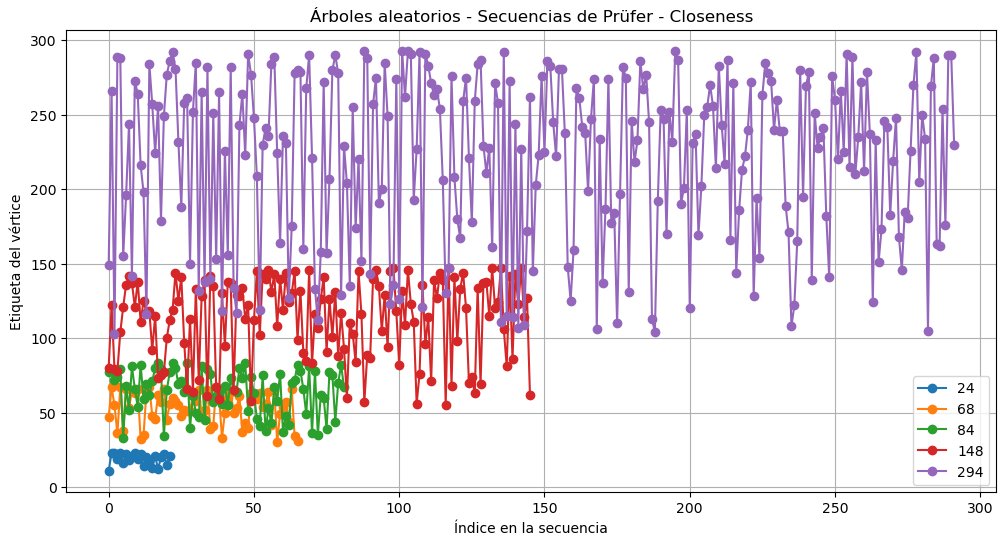

**** Procesando árbol aleatorio con 8 nodos y 7 aristas.
Es árbol:  True
[(0, 0.14285714285714285), (2, 0.14285714285714285), (6, 0.14285714285714285), (7, 0.14285714285714285), (4, 0.2857142857142857), (5, 0.2857142857142857), (1, 0.42857142857142855), (3, 0.42857142857142855)]
**** Procesando árbol aleatorio con 16 nodos y 15 aristas.
Es árbol:  True
[(0, 0.06666666666666667), (4, 0.06666666666666667), (5, 0.06666666666666667), (8, 0.06666666666666667), (12, 0.06666666666666667), (13, 0.06666666666666667), (1, 0.13333333333333333), (2, 0.13333333333333333), (3, 0.13333333333333333), (6, 0.13333333333333333), (7, 0.13333333333333333), (9, 0.13333333333333333), (14, 0.13333333333333333), (10, 0.2), (15, 0.2), (11, 0.26666666666666666)]
**** Procesando árbol aleatorio con 24 nodos y 23 aristas.
Es árbol:  True
[(0, 0.043478260869565216), (2, 0.043478260869565216), (4, 0.043478260869565216), (9, 0.043478260869565216), (12, 0.043478260869565216), (14, 0.043478260869565216), (16, 0.0434782

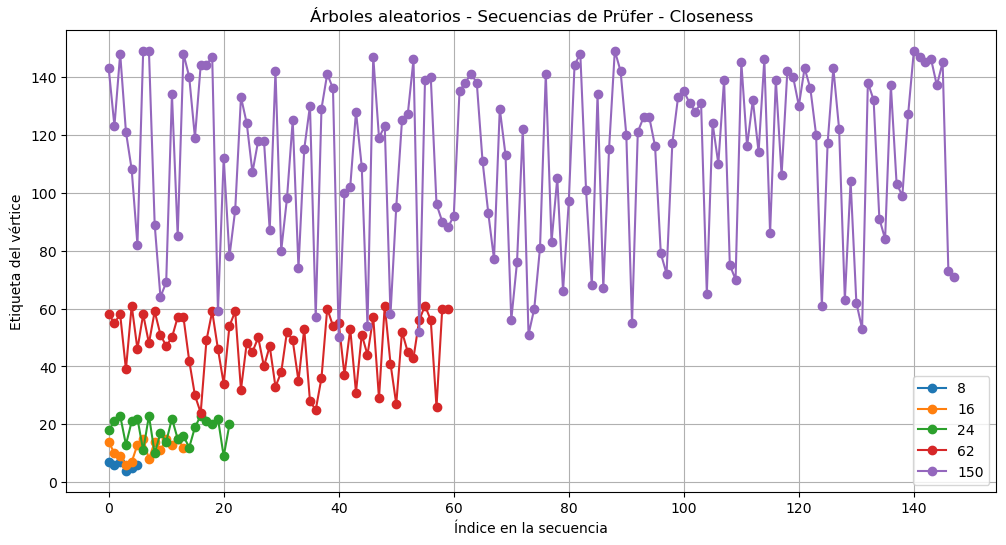

**** Procesando árbol aleatorio con 14 nodos y 13 aristas.
Es árbol:  True
[(2, 0.07692307692307693), (4, 0.07692307692307693), (7, 0.07692307692307693), (9, 0.07692307692307693), (11, 0.07692307692307693), (13, 0.07692307692307693), (1, 0.15384615384615385), (3, 0.15384615384615385), (6, 0.15384615384615385), (8, 0.15384615384615385), (12, 0.15384615384615385), (5, 0.23076923076923078), (10, 0.23076923076923078), (0, 0.3076923076923077)]
**** Procesando árbol aleatorio con 42 nodos y 41 aristas.
Es árbol:  True
[(0, 0.024390243902439025), (1, 0.024390243902439025), (5, 0.024390243902439025), (10, 0.024390243902439025), (11, 0.024390243902439025), (15, 0.024390243902439025), (20, 0.024390243902439025), (25, 0.024390243902439025), (29, 0.024390243902439025), (34, 0.024390243902439025), (35, 0.024390243902439025), (37, 0.024390243902439025), (39, 0.024390243902439025), (40, 0.024390243902439025), (3, 0.04878048780487805), (7, 0.04878048780487805), (8, 0.04878048780487805), (12, 0.0487804

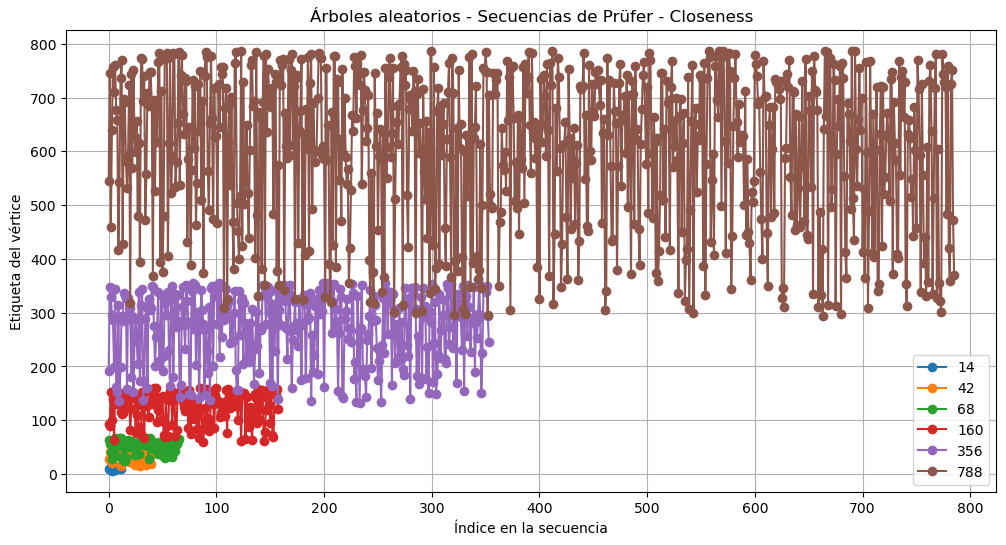

**** Procesando árbol aleatorio con 18 nodos y 17 aristas.
Es árbol:  True
[(0, 0.058823529411764705), (8, 0.058823529411764705), (11, 0.058823529411764705), (12, 0.058823529411764705), (13, 0.058823529411764705), (14, 0.058823529411764705), (17, 0.058823529411764705), (2, 0.11764705882352941), (3, 0.11764705882352941), (4, 0.11764705882352941), (6, 0.11764705882352941), (7, 0.11764705882352941), (10, 0.11764705882352941), (16, 0.11764705882352941), (1, 0.1764705882352941), (9, 0.1764705882352941), (15, 0.1764705882352941), (5, 0.23529411764705882)]
**** Procesando árbol aleatorio con 24 nodos y 23 aristas.
Es árbol:  True
[(3, 0.043478260869565216), (4, 0.043478260869565216), (6, 0.043478260869565216), (8, 0.043478260869565216), (9, 0.043478260869565216), (10, 0.043478260869565216), (13, 0.043478260869565216), (14, 0.043478260869565216), (16, 0.043478260869565216), (22, 0.043478260869565216), (2, 0.08695652173913043), (7, 0.08695652173913043), (11, 0.08695652173913043), (12, 0.0869565

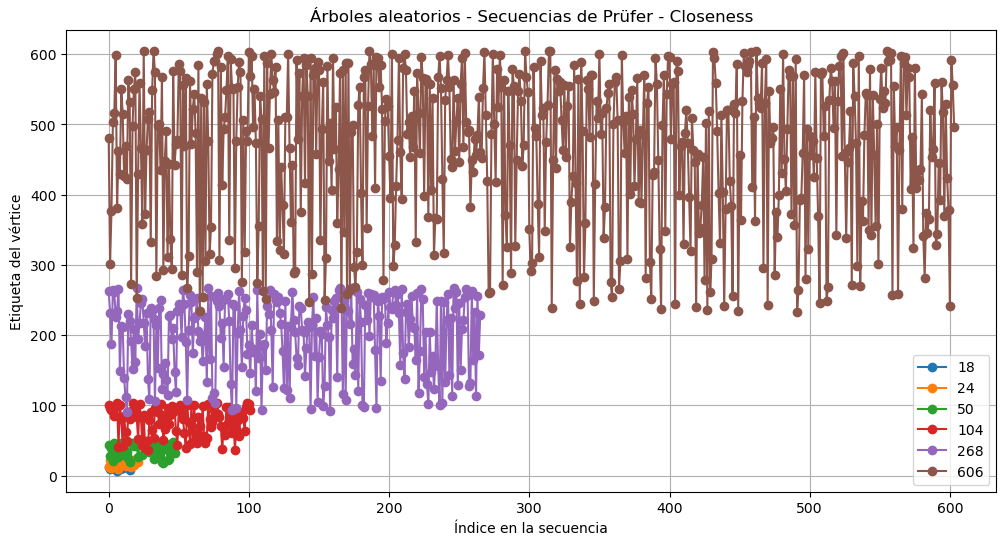

**** Procesando árbol aleatorio con 14 nodos y 13 aristas.
Es árbol:  True
[(1, 0.07692307692307693), (2, 0.07692307692307693), (7, 0.07692307692307693), (8, 0.07692307692307693), (10, 0.07692307692307693), (11, 0.07692307692307693), (13, 0.07692307692307693), (9, 0.15384615384615385), (12, 0.15384615384615385), (0, 0.23076923076923078), (3, 0.23076923076923078), (4, 0.23076923076923078), (5, 0.23076923076923078), (6, 0.23076923076923078)]
**** Procesando árbol aleatorio con 18 nodos y 17 aristas.
Es árbol:  True
[(3, 0.058823529411764705), (4, 0.058823529411764705), (7, 0.058823529411764705), (10, 0.058823529411764705), (14, 0.058823529411764705), (17, 0.058823529411764705), (0, 0.11764705882352941), (1, 0.11764705882352941), (6, 0.11764705882352941), (8, 0.11764705882352941), (9, 0.11764705882352941), (11, 0.11764705882352941), (12, 0.11764705882352941), (15, 0.11764705882352941), (2, 0.1764705882352941), (5, 0.1764705882352941), (13, 0.1764705882352941), (16, 0.1764705882352941)]
**

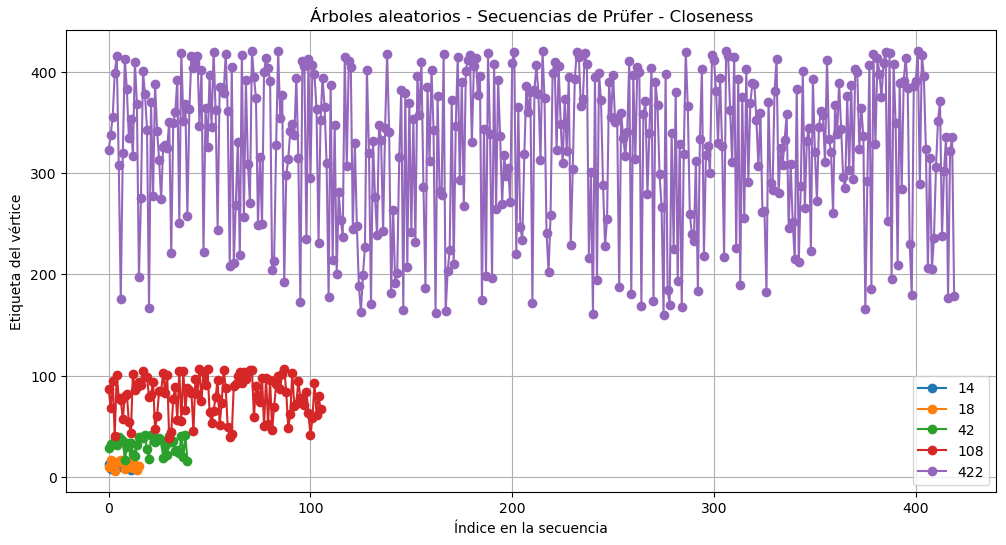

In [11]:
nodos_trichoderma = {1: [24, 68 , 84 , 148, 294],
                    2: [8, 16, 24, 62, 150],
                    3: [14, 42, 68, 160, 356, 788],
                    4: [18,24, 50,104, 268, 606],
                    5: [14,18,42,108,422]}
nodos_neurospora = {1: [42, 54 , 102 , 226, 663 ],
                    2: [44, 110, 226, 758,],
                    3: [6, 24, 50, 128, 338],
                    4: [58, 84, 202, 518, 1578],
                    5: [48, 100, 280, 790],
                    }
for i in range(1,6):
    prufer_seq = list()
    for n in nodos_trichoderma[i]:
        G = nx.generators.random_tree(n)
        print("**** Procesando árbol aleatorio con", G.number_of_nodes(), "nodos y", G.number_of_edges(), "aristas.")
        print("Es árbol: ", nx.is_tree(G))
        node_labels = etiquetado_por_centralidad(G, 1)
        G_relabelled = nx.relabel_nodes(G, node_labels, copy=True)
        ps = prufer_sequence_from_tree(G_relabelled.edges())
        #dibujar_arbol(G, red,pos, node_labels)
        #print("Secuencia de Prüfer:", ps)
        prufer_seq.append(ps)
    muestra_secuencias(prufer_seq, nodos_trichoderma[i], "Árboles aleatorios")

**** Procesando red: Muestra5_M5N24h con 13 nodos y 12 aristas.
Es árbol:  True


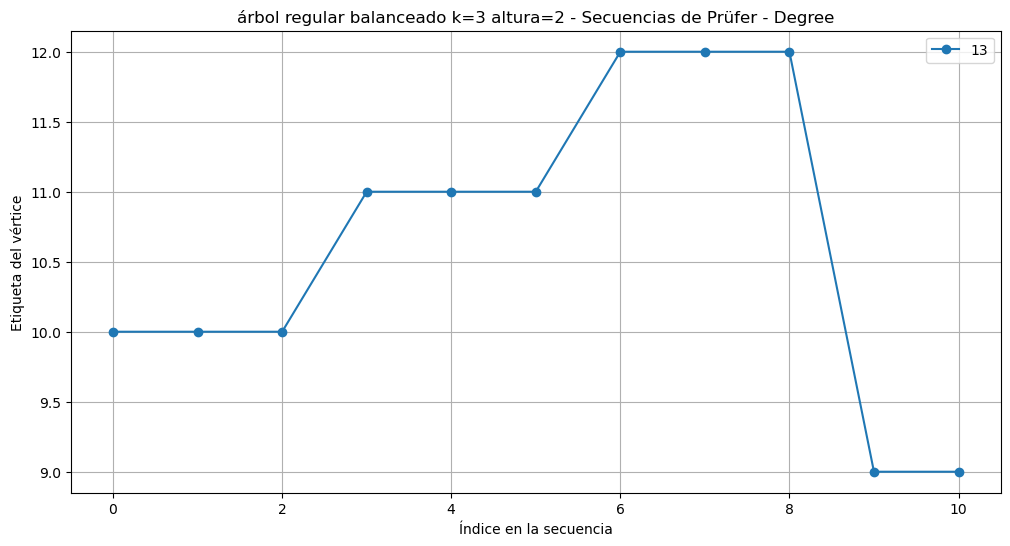

In [77]:
k=3
altura=2
G = generar_arbol_regular_balanceado(k, altura)
n = G.number_of_nodes()
print("**** Procesando red:", red, "con", n, "nodos y", G.number_of_edges(), "aristas.")
print("Es árbol: ", nx.is_tree(G))
node_labels = etiquetado_por_centralidad(G, CENTRALIDAD)
G_relabelled = nx.relabel_nodes(G, node_labels, copy=True)
ps = prufer_sequence_from_tree(G_relabelled.edges())
#dibujar_arbol(G, red,pos, node_labels)
#print("Secuencia de Prüfer:", ps)
muestra_secuencias([ps],[n], "árbol regular balanceado k=" + str(k) + " altura=" + str(altura))

In [44]:
import random
def sample_with_replacement(population, k):
    """Returns a sample of size ``k`` from the given population.

    ``population`` must be a sequence and ``k`` must be a positive
    integer.

    This function returns a list of ``k`` elements chosen uniformly at
    random from ``population``.

    """
    return [random.choice(population) for i in range(k)]
n= 10
sequence = sample_with_replacement(range(n), n - 2)
print("Secuencia de Prüfer aleatoria:", sequence)
T = nx.from_prufer_sequence(sequence)
diametro = nx.diameter(T)
print("Diámetro del árbol generado a partir de la secuencia de Prüfer aleatoria:", diametro)
for i in range(1,100):
    x = sequence.count(i)
    if x > 3:
        print("Cuántos ", i ," hay ", sequence.count(i))

Secuencia de Prüfer aleatoria: [1, 4, 0, 1, 5, 0, 7, 4]
Diámetro del árbol generado a partir de la secuencia de Prüfer aleatoria: 6
